# Simple ARIMA Timeseries Model Template with Example

#### Import components of time series:
- trend - a long-term increase of decrease in the data
- seasonality - data is affected by seasonal factors - hours of the day, week, month, year
- cycles - occurs when the data ehibits rises and falls that are not of a fixed frequency
- random noise - residuals 

#### Steps to take:
0. EDA
    1. Research and Brainstorm
    2. Preprocessing
    3. Individual Variable Timeseries Exploration
    4. Decomposition Exploration
    5. Variable Correlation Timeseries Exploration
    6. Conclusion and Next Steps
1. Check Stationarity
2. Stationarize data if not stationary
3. Split data into test and train data
4. Select model and terms
5. Build the model
6. Validate Model

# 0. EDA

## A. Research and Brainstorm

### Research the context of the data
    - how was the data collected?
    - who collected the data?
    - are there any biases that could have come from the data?
    - is there any domain knowledge needed in order to informly explore this data?
    - are there any variables that require research to understand their full meaning?
### Brainstorm questions and concepts that may or may not be answered with the data
    - are there any variables you suspect would correlate?
    - are there any variables that are expected to have certain trends or values?

## B. Preprocessing

### Important issues to look for in the data

#### Duplicates
    - does the data have duplicates that need to be removed?
    - how does keeping or removing duplicate values change the insight from later EDA?
#### Null Values 
    - does the data have null values that should be removed?
    - how does keeping or removing null values change the insight from later EDA?
#### Oulier Values
    - do categorical varibles have resonable responses - example variables states have only real states?
    - do quantitative variables have a resonable range and standard deviation?
#### Inconsistent formats
    - do the variables have data types that make sense for the variable?

In [105]:
#load in packages
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [106]:
#load in data
#https://www.kaggle.com/srinuti/residential-power-usage-3years-data-timeseries

data = pd.read_csv("Data/power_usage_2016_to_2020.csv", header=0, parse_dates=[0])

#have a large dataset?

# ! pip install datatble
# import datatable as dt
# data = dt.fread("").to_pandas()

In [107]:
data.head()

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday


In [108]:
#number of duplicates 
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


In [109]:
#number of na values by variable
nulls = data.isnull().sum().sort_values(ascending=False)
print("Number of missing values:")
nulls.head(20)

Number of missing values:


StartDate      0
Value (kWh)    0
day_of_week    0
notes          0
dtype: int64

In [110]:
#observe unique values of variables to see if anything is sus
for variables in data.columns:
    print("----------------------------------------------")
    print("unique values of variable: " + str(variables))
    print(data[variables].unique())

----------------------------------------------
unique values of variable: StartDate
['2016-01-06T00:00:00.000000000' '2016-01-06T01:00:00.000000000'
 '2016-01-06T02:00:00.000000000' ... '2020-07-07T21:00:00.000000000'
 '2020-07-07T22:00:00.000000000' '2020-07-07T23:00:00.000000000']
----------------------------------------------
unique values of variable: Value (kWh)
[1.057 1.171 0.56  ... 2.985 2.93  2.872]
----------------------------------------------
unique values of variable: day_of_week
[2 5 6 4 0 1 3]
----------------------------------------------
unique values of variable: notes
['weekday' 'weekend' 'vacation' 'COVID_lockdown']


In [111]:
#statistical values of numerical variables
data.describe()

,Value (kWh),day_of_week
count,35952.000000,35952.000000
mean,0.891631,2.997330
std,0.908133,1.999024
min,0.064000,0.000000
25%,0.323750,1.000000
50%,0.501000,3.000000
75%,1.072000,5.000000
max,6.446000,6.000000


In [112]:
#find format of variables
print(data.dtypes)

StartDate      datetime64[ns]
Value (kWh)           float64
day_of_week             int64
notes                  object
dtype: object


## C. Individual Variables Exploration
    - is there a dominated value for certain variables?
    - is there an interesting distribution within the responses?
    - do the responses make sense based on the context and background of the data?

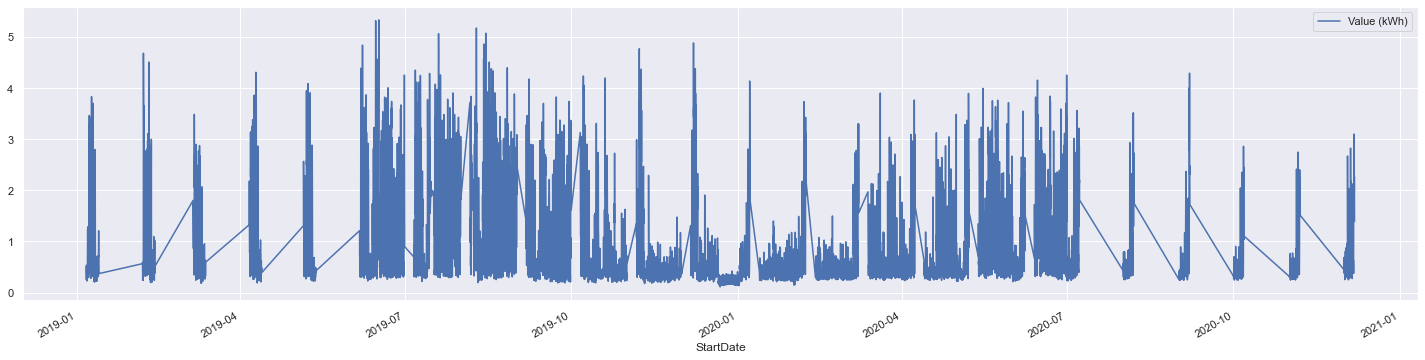

In [136]:
#we are only going to look at two years worth of data for right now
data1 = data[['StartDate', 'Value (kWh)']]
data1 = data1.set_index('StartDate')
data1 = data1['2019-01-06 00:00:00':]
data1.plot(figsize=(25,6))
pass

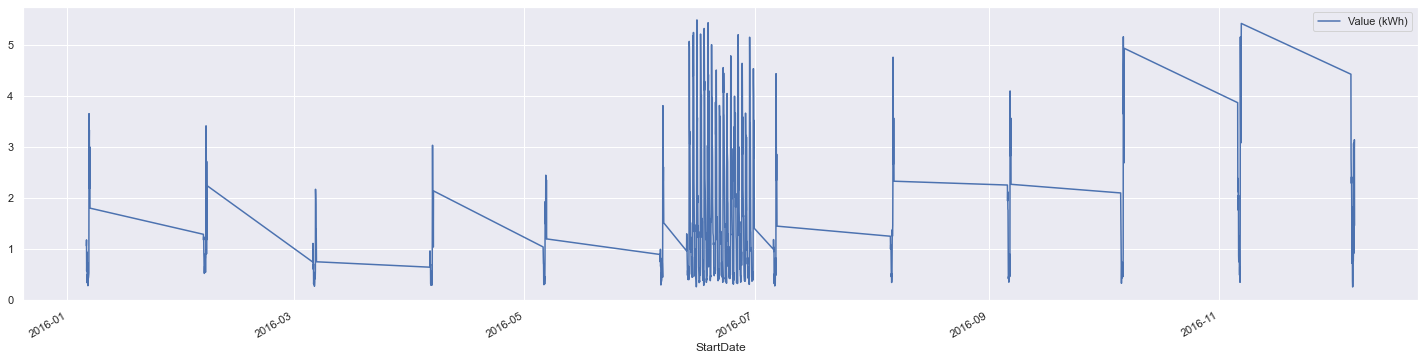

In [114]:
#lets look at only a month of data
one_month = data1[:720]
one_month.plot(figsize=(25,6))
pass

## D. Decomposition Plots
#### Import components of time series:
- trend - a long-term increase of decrease in the data
- seasonality - data is affected by seasonal factors - hours of the day, week, month, year
- cycles - occurs when the data ehibits rises and falls that are not of a fixed frequency
- random noise - residuals 

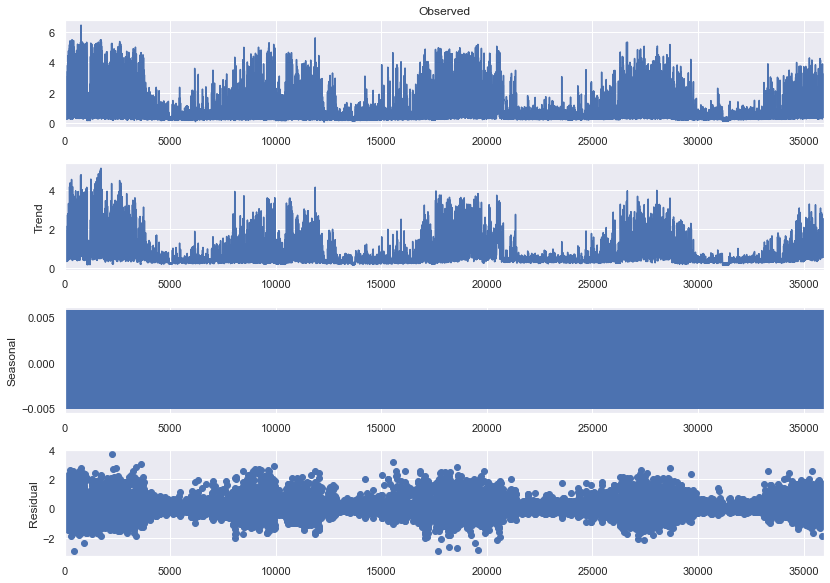

In [115]:
#set size for plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

#decomposition of the entire data set
seasonal_decompose(np.array(data1), model='additive', period=7).plot()
pass

## E. Variable Correlation Timeseries Exploration


In [116]:
#Often important to aggregate many of the features to compare
day_week_mean = data.groupby('day_of_week')['Value (kWh)'].mean()
day_week_mean.head(20)

day_of_week
0    0.861824
1    0.870365
2    0.866909
3    0.903988
4    0.883665
5    0.919860
6    0.934904
Name: Value (kWh), dtype: float64

In [117]:
special_day_mean = data.groupby('notes')['Value (kWh)'].mean()
special_day_mean.head(20)

notes
COVID_lockdown    0.863509
vacation          0.436342
weekday           0.892798
weekend           0.951693
Name: Value (kWh), dtype: float64

In [118]:
#create individual columns from the timestamp
data['year'] = data['StartDate'].dt.year
data['month'] = data['StartDate'].dt.month
data['hour'] = data['StartDate'].dt.hour

In [119]:
data.head()

,StartDate,Value (kWh),day_of_week,notes,year,month,hour
0,2016-01-06 00:00:00,1.057,2,weekday,2016,1,0
1,2016-01-06 01:00:00,1.171,2,weekday,2016,1,1
2,2016-01-06 02:00:00,0.560,2,weekday,2016,1,2
3,2016-01-06 03:00:00,0.828,2,weekday,2016,1,3
4,2016-01-06 04:00:00,0.932,2,weekday,2016,1,4


In [120]:
month_mean = data.groupby('month')['Value (kWh)'].mean()
month_mean.head(20)

month
1     0.637175
2     0.657002
3     0.682475
4     0.730380
5     0.952676
6     1.220692
7     1.262857
8     1.318578
9     1.133567
10    0.797658
11    0.649320
12    0.595305
Name: Value (kWh), dtype: float64

In [121]:
year_mean = data.groupby('year')['Value (kWh)'].mean()
year_mean.head(20)

year
2016    1.294720
2017    0.768626
2018    0.919141
2019    0.830247
2020    0.738193
Name: Value (kWh), dtype: float64

In [122]:
hour_mean = data.groupby('hour')['Value (kWh)'].mean()
hour_mean.head(20)

hour
0     0.955613
1     0.862927
2     0.786097
3     0.736248
4     0.659669
5     0.571730
6     0.583111
7     0.481826
8     0.426954
9     0.427882
10    0.438290
11    0.479682
12    0.522488
13    0.620762
14    0.743769
15    0.890449
16    1.075678
17    1.472707
18    1.513294
19    1.380393
Name: Value (kWh), dtype: float64

## F. Conclusion and Next Steps

# 1. Check Stationarity
- stationarity is the property of exhibiting constant statistical properties (mean, variance, autocorrelation)
- you can also check for stationary from the Augmented Dickey-Fuller Test

In [123]:
def station_test(data, window):
    rolmean = data.rolling(window=window).mean()
    rolstd = data.rolling(window=window).std()
    
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    pass

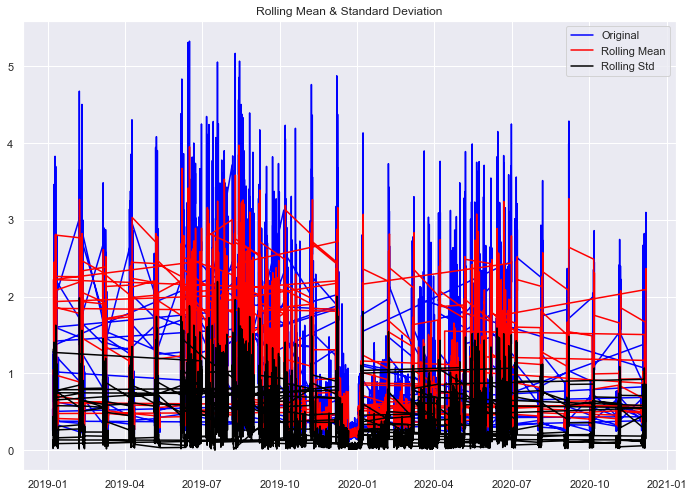

In [138]:
#going back to only using the 2 years worth of data
station_test(data1, 7)

# Step 2: Making the Data Stationary
- Detrending - remove underlying trend in the time series
- Differencing - removed underlying seasonal or cyclical patterns
    - this is done by subtracting periodic values 

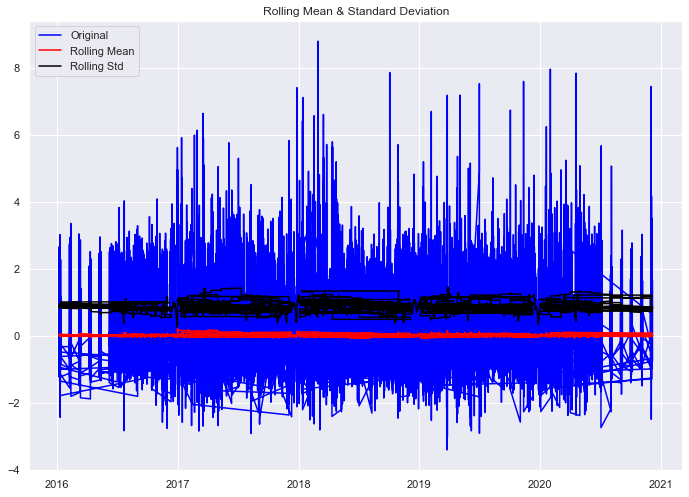

In [140]:
#detrending
y = data
y_detrend =  (y - y.rolling(window=7).mean())/y.rolling(window=143).std()

station_test(y_detrend, 143)

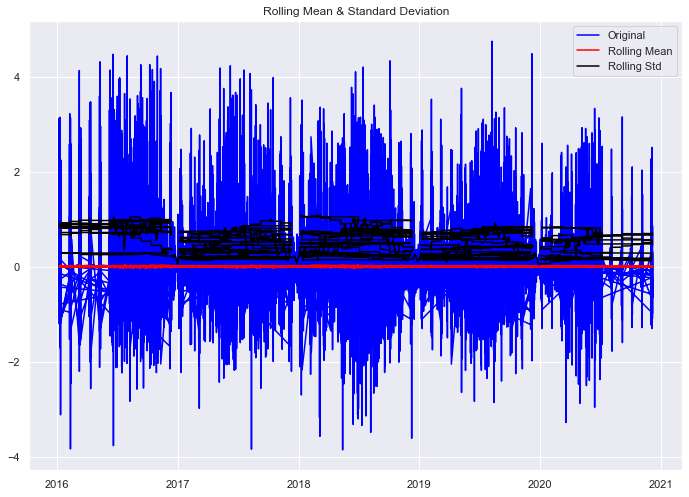

In [142]:
#differencing
y_lag =  y - y.shift(1)

station_test(y_lag, 143)

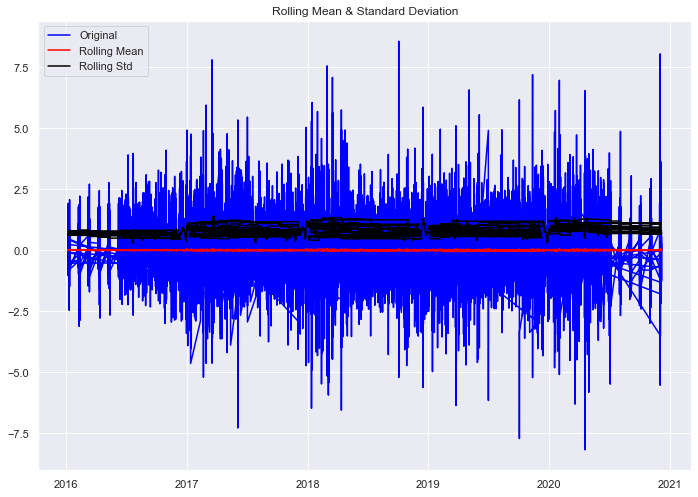

In [143]:
#combining detrending and differencing
y_lag_detrend = y_detrend - y_detrend.shift(1)

station_test(y_lag_detrend, 143)

# Step 3: Split data into training and test data

In [148]:
length = len(y_lag_detrend)
length_80 = int(length*.8)

# data1 = data1.reset_index()

#splitting up detrended and differencing data
data_to_train = data1[:length_80] #80% of the data to train on 
data_to_test = data1[length_80:] #20% of the data to test on

# Step 4: Choose Model and Terms

#### ARIMA
Arima models are a subset of linear regression that attempts to use the past observations to forcast future values. 
ARIMA stands for Autoregressive Integrated Moving Average
- should only be used on stationary data
- notation: ARIMA(p, d, q) where p = seasonality, d = trend, q = noise
- make up of three parts:
     - a weighted sum of lagged values of the series (Auto-regressive (AR) part)
     - a weighted sum of lagged forcasted errors of the series (Moving Average MA)
     - a difference of the time series (Integrated (I))
- p = AR, d = I, q = MA

#### Simple Exponential Smoothing (SES)
- non-stationary data can be used with this model
- best to use when few data points, irregular data, no seaonality or trend
- made up of only a level component that is a weighted average of the previous level and current observation

#### Holt's Linear Trend Model
- best to use when trend in data, no seasonality 
- made up of a level and trend component


# Step 5: Train Model

### ARIMA
#### Step 1: Choosing the differencing order

Below I plot the autocorrelation for the first 100 data points - here I am hoping to see how the data might lag to choose auto-regression value for the model. The lag is pretty large, so we will likely need a large AR number in order to get a mean of 0 for the model. 

This autocorrelation (ACF) plot represents the autocorrelation of the series with lags of itself.
Ideally, we want no correlation between the series and lags of itself.

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

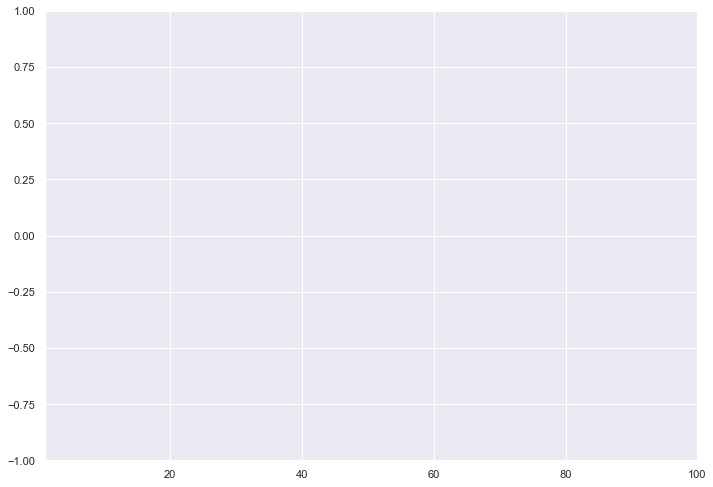

In [149]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data1[:100])
plt.show()

In [150]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

model = ARIMA(data_to_train, (1, 1, 1))
fit_model = model.fit()
print(fit_model.summary())

residuals = fit_model.resid
residuals.plot()
plt.show()
print(residuals.describe())

/Users/mikayla/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# The distribution of the residual errors is displayed.
model2 = ARIMA(data_to_train, (10, 1, 0))
fit_model2 = model2.fit()
print(fit_model2.summary())
residuals2 = pd.DataFrame(fit_model2.resid)
residuals2.plot()
plt.show()
print(residuals2.describe())

# Step 6: Predict

In [ ]:
pred1 = fit_model.forecast(9)
print(pred1[0])

pred1 = fit_model2.forecast(9)
print(pred1[0])

print(data_to_test[:9])